In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import math

IMPORTING DATASETS

In [ ]:
# Importing the Apple stock data
from google.colab import files
Upload=files.upload()

price = pd.read_csv('HistoricalData_APPLE.csv', index_col='Date', parse_dates=['Date'])


Saving HistoricalData_APPLE.csv to HistoricalData_APPLE (4).csv


In [ ]:
X = price.iloc[: ]
price.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [36]:
# Importing the headlines
from google.colab import files
Upload=files.upload()
headlines= pd.read_csv('gethistoricalmarketheadlines_20210610163519.csv')

In [37]:
headlines.head()

,Outcome,Message,Identity,Delay,Headlines Securities CIK,Headlines Securities CUSIP,Headlines Securities Symbol,Headlines Securities ISIN,Headlines Securities Valoren,Headlines Securities Name,Headlines Securities Market,Headlines Securities MarketIdentificationCode,Headlines Securities MostLiquidExchange,Headlines Securities CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Images,Headlines Tags TagType,Headlines Tags TagValues,Headlines PaywallType,Headlines Summary
0,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Symbols,NaN,None,"""We need a better framework so that we can jus..."
1,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Companies,NaN,None,"""We need a better framework so that we can jus..."
2,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Sectors,NaN,None,"""We need a better framework so that we can jus..."
3,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Topics,NaN,None,"""We need a better framework so that we can jus..."
4,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP/USD sellers attack 1.4100 amid Brexit dold...,6/9/2021,11:56 PM,0,FXStreet News,https://www.fxstreet.com/news/gbp-usd-sellers-...,https://editorial.fxstreet.com/images/Markets/...,Topics,NaN,None,Read more on https://www.fxstreet.com...


EDA

In [ ]:
#checking for Missing Values in Stock dataset and Headlines dataset
print(price.isna().sum())
print('shape -> ',price.shape[0])

print(headlines.isna().sum())
print('shape -> ',headlines.shape[0])

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
shape ->  2516
Outcome                                             0
Message                                          6756
Identity                                            0
Delay                                               0
Headlines Securities CIK                          240
Headlines Securities CUSIP                       6756
Headlines Securities Symbol                        43
Headlines Securities ISIN                        6756
Headlines Securities Valoren                       86
Headlines Securities Name                          43
Headlines Securities Market                        43
Headlines Securities MarketIdentificationCode      43
Headlines Securities MostLiquidExchange             9
Headlines Securities CategoryOrIndustry            43
Headlines Title                                     0
Headlines Date                                      0
Headlines Time              

In [38]:
#As there are many null values in headlines dataset , calculating percenatge of null values
total_cells = np.product(headlines.shape)
total_missing = headlines.isna().sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

Outcome                                          0.000000
Message                                          4.000000
Identity                                         0.000000
Delay                                            0.000000
Headlines Securities CIK                         0.142096
Headlines Securities CUSIP                       4.000000
Headlines Securities Symbol                      0.025459
Headlines Securities ISIN                        4.000000
Headlines Securities Valoren                     0.050918
Headlines Securities Name                        0.025459
Headlines Securities Market                      0.025459
Headlines Securities MarketIdentificationCode    0.025459
Headlines Securities MostLiquidExchange          0.005329
Headlines Securities CategoryOrIndustry          0.025459
Headlines Title                                  0.000000
Headlines Date                                   0.000000
Headlines Time                                   0.000000
Headlines UTCO

In [42]:

headlines_with_na_imputed = headlines.fillna(method='bfill', axis=0).head()


**PRICE** **DATA**

In [50]:
# Removing $ symbol from Close, Open, High and Low columns to convert them to float values
price['Close/Last'] = list(map(lambda x: x[1:], price['Close/Last'].values))
price['Open'] = list(map(lambda x: x[1:], price['Open'].values))
price['High'] = list(map(lambda x: x[1:], price['High'].values))
price['Low'] = list(map(lambda x: x[1:], price['Low'].values))

# Converting the above columns to float dataype
price['Close/Last'] = price['Close/Last'].astype(float)
price['Open'] = price['Open'].astype(float)
price['High'] = price['High'].astype(float)
price['Low'] = price['Low'].astype(float)

In [51]:
price.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.13,56877940,127.21,127.75,126.5200
2021-06-08,126.74,74403770,126.60,128.46,126.2101
2021-06-07,125.90,71057550,126.17,126.32,124.8321
2021-06-04,125.89,75169340,124.07,126.16,123.8500
2021-06-03,123.54,76229170,124.68,124.85,123.1300


In [59]:
price.sort_index(axis = 0,inplace=True)

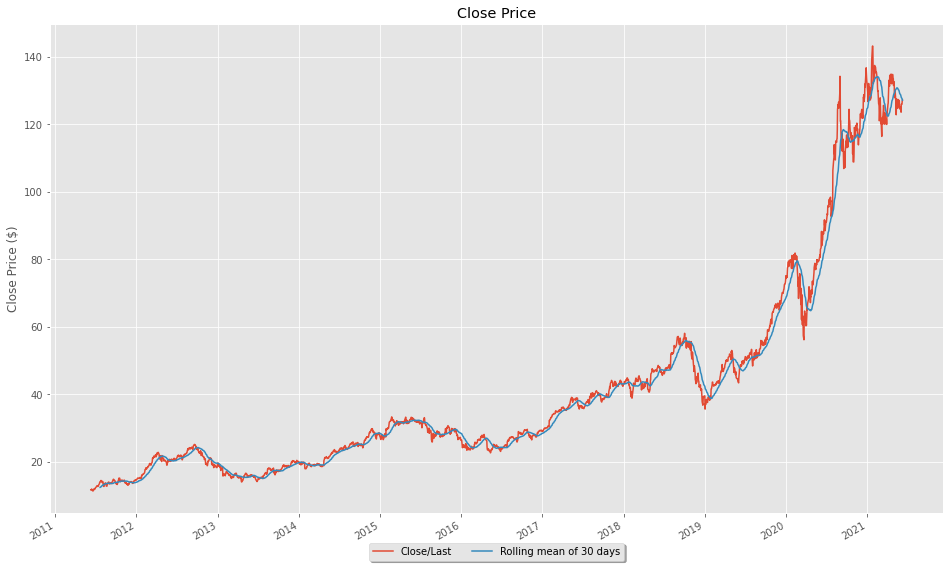

In [61]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
price['Close/Last'].plot(label="Close/Last")

plt.plot(price['Close/Last'].rolling(30).mean(),label="Rolling mean of 30 days")

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

In [53]:
# Getting the training data
dataset = price.filter(['Close/Last']).values
trainset_len = math.ceil(len(dataset)*0.8)

Feature Scaling

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.87846725]
 [0.87551043]
 [0.8691419 ]
 ...
 [0.00463614]
 [0.00305462]
 [0.00286508]]


In [55]:

# create training dataset
trainset_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:trainset_len, :]

X_train = []
y_train = []
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
     print(X_train)
     print(y_train)

[array([0.87846725, 0.87551043, 0.8691419 , 0.86906609, 0.85124937,
       0.86277337, 0.85685974, 0.85936166, 0.86444132, 0.8763444 ,
       0.87672348, 0.8782398 , 0.86557856, 0.87983193, 0.85996819,
       0.86118124, 0.87194709, 0.88089335, 0.86209103, 0.84541155,
       0.86921772, 0.8763444 , 0.90181852, 0.89825517, 0.88582138,
       0.88392599, 0.9194836 , 0.9112955 , 0.92661029, 0.92736845,
       0.93350953, 0.93601145, 0.93297882, 0.91493465, 0.92676192,
       0.9238051 , 0.93692124, 0.93176577, 0.9343435 , 0.915617  ,
       0.93381279, 0.90962755, 0.92293322, 0.90295576, 0.88430506,
       0.87149219, 0.8691419 , 0.84715531, 0.84071097, 0.82365241,
       0.83494897, 0.83358428, 0.8288837 , 0.82509291, 0.84366779,
       0.85011213, 0.82433475, 0.82842881, 0.8604989 , 0.86663998])]
[0.8546610805573372]
[array([0.87846725, 0.87551043, 0.8691419 , 0.86906609, 0.85124937,
       0.86277337, 0.85685974, 0.85936166, 0.86444132, 0.8763444 ,
       0.87672348, 0.8782398 , 0.8655

HEADLINES Dataset

In [57]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
corpus = []
# Data = pd.read_csv('gethistoricalmarketheadlines_20210610163519.csv')
for i in range(0, 6756):
    review = re.sub('[^a-zA-Z]', ' ', columns_with_na_dropped['Headlines Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)